### Imports

if the allen sdk import fails due to soft_unicode please run cell 2

In [3]:
import sys,os
from pathlib import Path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))

# Allen SDK data (Visual Behavior project)
import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

# dataset plotting
import brain_observatory_utilities.plotting.ophys_plots as ophys_plt

In [ ]:
# you may need to make the following install and rerun the first cell
pip install soft_unicode

### Loading an example dataset with Allen SDK

In [4]:
# Update this to a valid directory in your filesystem
data_storage_directory = os.path.join(".","data")
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

See what optical physiology ("ophys") experiment datasets there are

In [5]:
ophys_experiment_table = cache.get_ophys_experiment_table()
ophys_experiment_table

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947716576,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,152.0,Vip-IRES-Cre,GCaMP6f,3.0,...,929913236,VisualBehavior,175,VISp,2019-09-16 16:46:16.000000,OPHYS_3_images_A,Familiar,False,A,947805783
948507789,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,153.0,Vip-IRES-Cre,GCaMP6f,3.0,...,929913236,VisualBehavior,175,VISp,2019-09-17 17:39:10.000000,OPHYS_3_images_A,Familiar,False,A,949405820
950833329,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,155.0,Vip-IRES-Cre,GCaMP6f,4.0,...,929913236,VisualBehavior,175,VISp,2019-09-19 15:34:06.000000,OPHYS_4_images_B,Novel 1,False,B,951266634


select a random experiment ID and load the dataset for it

In [7]:
ophys_experiment_id = 1051216600
ophys_dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id)

C:\Users\kater\Anaconda3\envs\local_test_vbplot\lib\site-packages\pynwb\ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
C:\Users\kater\Anaconda3\envs\local_test_vbplot\lib\site-packages\pynwb\ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "


### Behavior attribute plotting

Plot individual datastreams

<AxesSubplot:title={'center':'running speed'}, xlabel='time (sec)', ylabel='speed (cm/s)'>

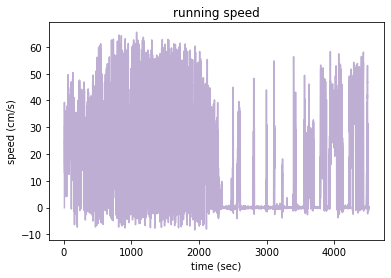

In [8]:
ophys_plt.plot_running(ophys_dataset)

<AxesSubplot:title={'center':'pupil area'}, xlabel='time (sec)', ylabel='pupil area\n$(pixels^2)$'>

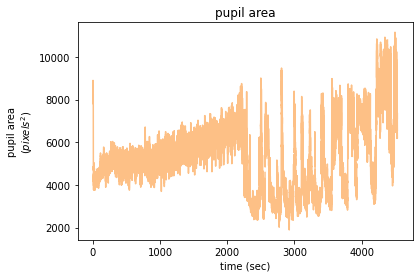

In [9]:
ophys_plt.plot_pupil_area(ophys_dataset)

experiment=True


(<Figure size 1080x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'running speed'}, ylabel='speed (cm/s)'>,
        <AxesSubplot:title={'center':'licks and rewards'}>,
        <AxesSubplot:title={'center':'pupil area'}, ylabel='pupil area\n$(pixels^2)$'>],
       dtype=object))

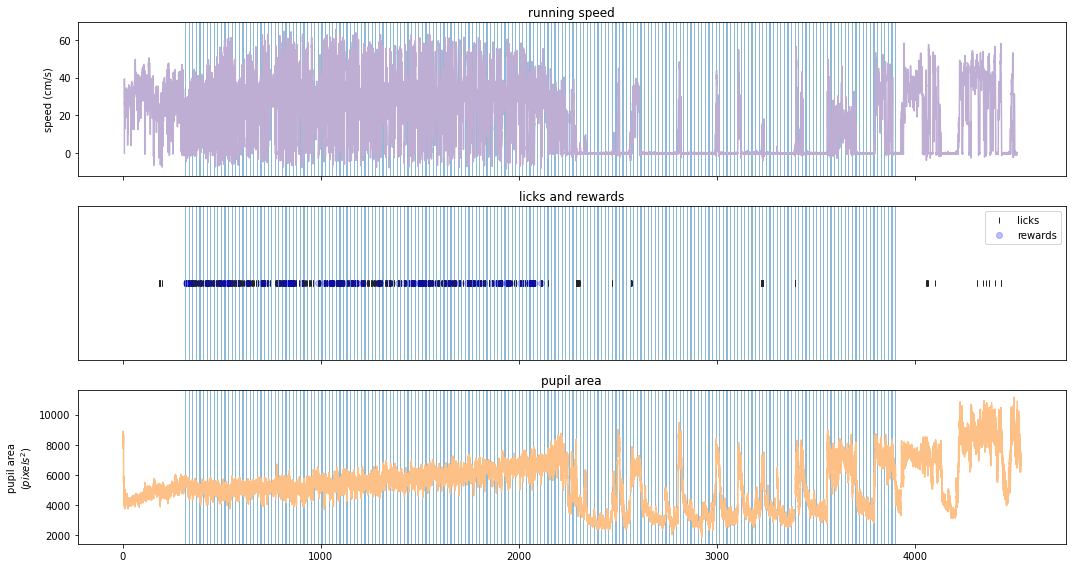

In [10]:
ophys_plt.plot_behavioral_streams(ophys_dataset)

### Neural / optical physiology attribute plots

Plot the projections: 2D image of the microscope field of view, (average or maximum pixel value across the 
experiment)

<AxesSubplot:>

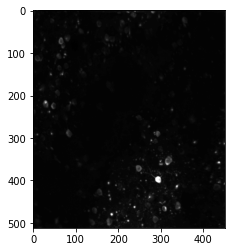

In [11]:
ophys_plt.plot_max_projection(ophys_dataset)

<AxesSubplot:>

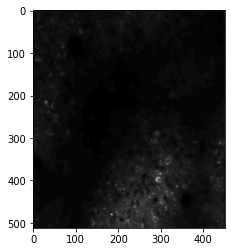

In [12]:
ophys_plt.plot_average_projection(ophys_dataset)

plot the segmented neurons / regions of interest

<AxesSubplot:>

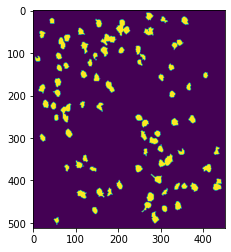

In [13]:
ophys_plt.plot_segmentation_masks(ophys_dataset)

plot the segmented cells on top of the field of view projections

<AxesSubplot:>

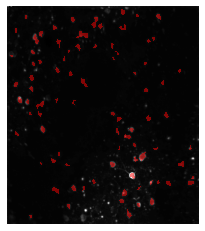

In [14]:
# default behavior is masks plotted over the max intensity projection
ophys_plt.plot_segmentation_mask_overlay(ophys_dataset)

<AxesSubplot:>

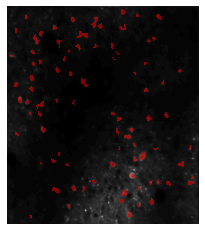

In [15]:
ophys_plt.plot_segmentation_mask_overlay(ophys_dataset, projection_type = "average")

Plot the fluorescence / cell activity trace 

<AxesSubplot:title={'center':'Fluorescence trace'}, xlabel='time (sec)', ylabel='df/f'>

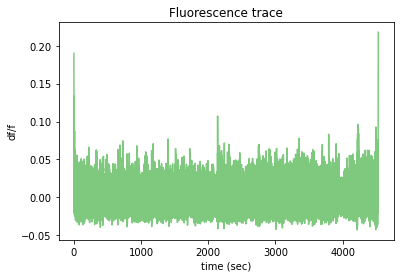

In [16]:
# default is the average fluroescence trace for all segmented neurons
ophys_plt.plot_dff(ophys_dataset)

or specify a specific neuron/cell to plot the fluorescence for

In [17]:
ophys_plt.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
1086621740,1080654373,"[0.06692548841238022, 0.043500468134880066, 0...."
1086630495,1080654374,"[0.11944416910409927, 0.20183171331882477, 0.1..."
1086630031,1080654375,"[0.11578042805194855, 0.07374598830938339, 0.1..."
1086628231,1080654376,"[0.0567757673561573, 0.09193411469459534, 0.07..."
1086634363,1080654378,"[0.2445712387561798, 0.16854964196681976, 0.10..."
...,...,...
1086614126,1080654609,"[0.18476630747318268, 0.006621181033551693, 0...."
1086614502,1080654612,"[0.15117710828781128, 0.18273353576660156, 0.1..."
1086621548,1080654614,"[0.1211460754275322, 0.13360996544361115, 0.20..."


<AxesSubplot:title={'center':'Fluorescence trace'}, xlabel='time (sec)', ylabel='df/f'>

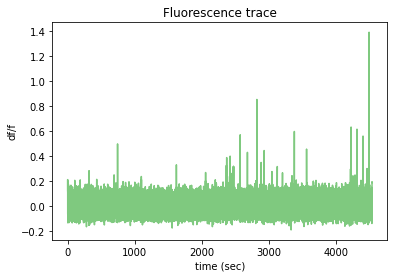

In [18]:
# or specify a specific neuron/cell to plot the fluorescence for
ophys_plt.plot_dff(ophys_dataset, cell_specimen_id = 1086621548)

plot a heatmap of all the fluroescence activity for all neurons in an ophys dataset

C:\Users\kater\AI_python_packages\visual_behavior_plotting\visual_behavior\plotting\neural_plots.py:201: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, timestamps[-1], 300))


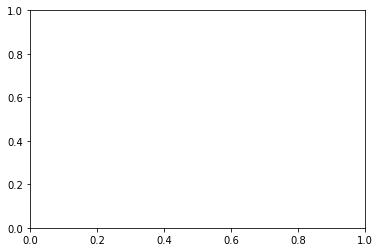

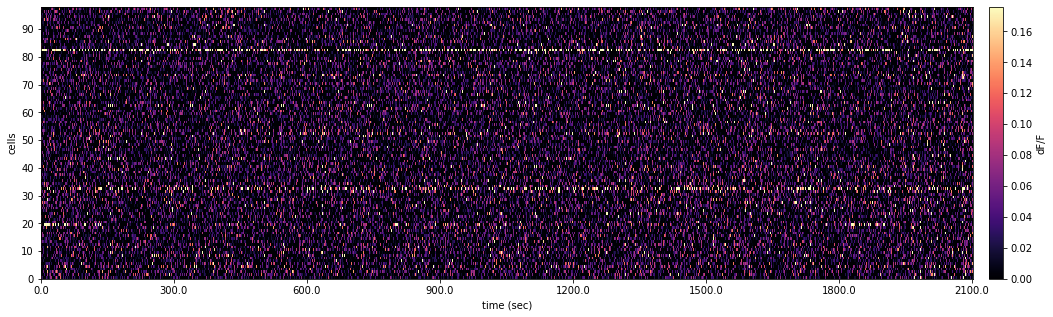

In [19]:
ophys_plt.plot_dff_heatmap(ophys_dataset)